In [ ]:
SK

# AUTHOR: SAHANA M

# **Internship project at Bharat Intern**

# **TASK1: HOUSE PRICE PREDICTION**



House price prediction involves forecasting the future market value of residential properties using various quantitative techniques. This process is crucial for buyers, sellers, investors, and policymakers to make informed decisions.


**Dataset information:**

DataSet taken from Kaggle.com

Price: The price of the house.

Area: The total area of the house in square feet.

Bedrooms: The number of bedrooms in the house.

Bathrooms: The number of bathrooms in the house.

Stories: The number of stories in the house.

Mainroad: Whether the house is connected to the main road (Yes/No).

Guestroom: Whether the house has a guest room (Yes/No).

Basement: Whether the house has a basement (Yes/No).

Hot water heating: Whether the house has a hot water heating system (Yes/No).

Airconditioning: Whether the house has an air conditioning system (Yes/No).

Parking: The number of parking spaces available within the house.

Prefarea: Whether the house is located in a preferred area (Yes/No).

Furnishing status: The furnishing status of the house (Fully Furnished, Semi-Furnished, Unfurnished).


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

Loading the dataset

In [3]:
data=pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

SUMMARY STATISTICS:


In [10]:
data.describe(include='all')


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


-Price:

Count: 545 houses

Mean (Average) Price: $4,766,729

Standard Deviation (Std): $1,870,440 (indicates variability in prices)

Minimum Price: $1,750,000

25th Percentile (Q1): $3,430,000 (25% of houses are below this price)

Median (50th Percentile): $4,340,000

75th Percentile (Q3): $5,740,000 (75% of houses are below this price)

Maximum Price: $13,300,000

Similarly the table shows for other factors or variables as well

Check for skewness and kurtosis:

Skewness: Skewness measures the asymmetry of the data distribution.

Kurtosis:Kurtosis measures the "tailedness" of the data distribution.

In [9]:
from scipy.stats import skew, kurtosis

numerical_data = data.select_dtypes(include=['number'])

# Calculate skewness and kurtosis
skewness = numerical_data.skew()
kurtosis_values = numerical_data.kurtosis()

print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis_values)

Skewness:
 price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

Kurtosis:
 price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64


Not appling any transformation to the data

Graphical Analysis:

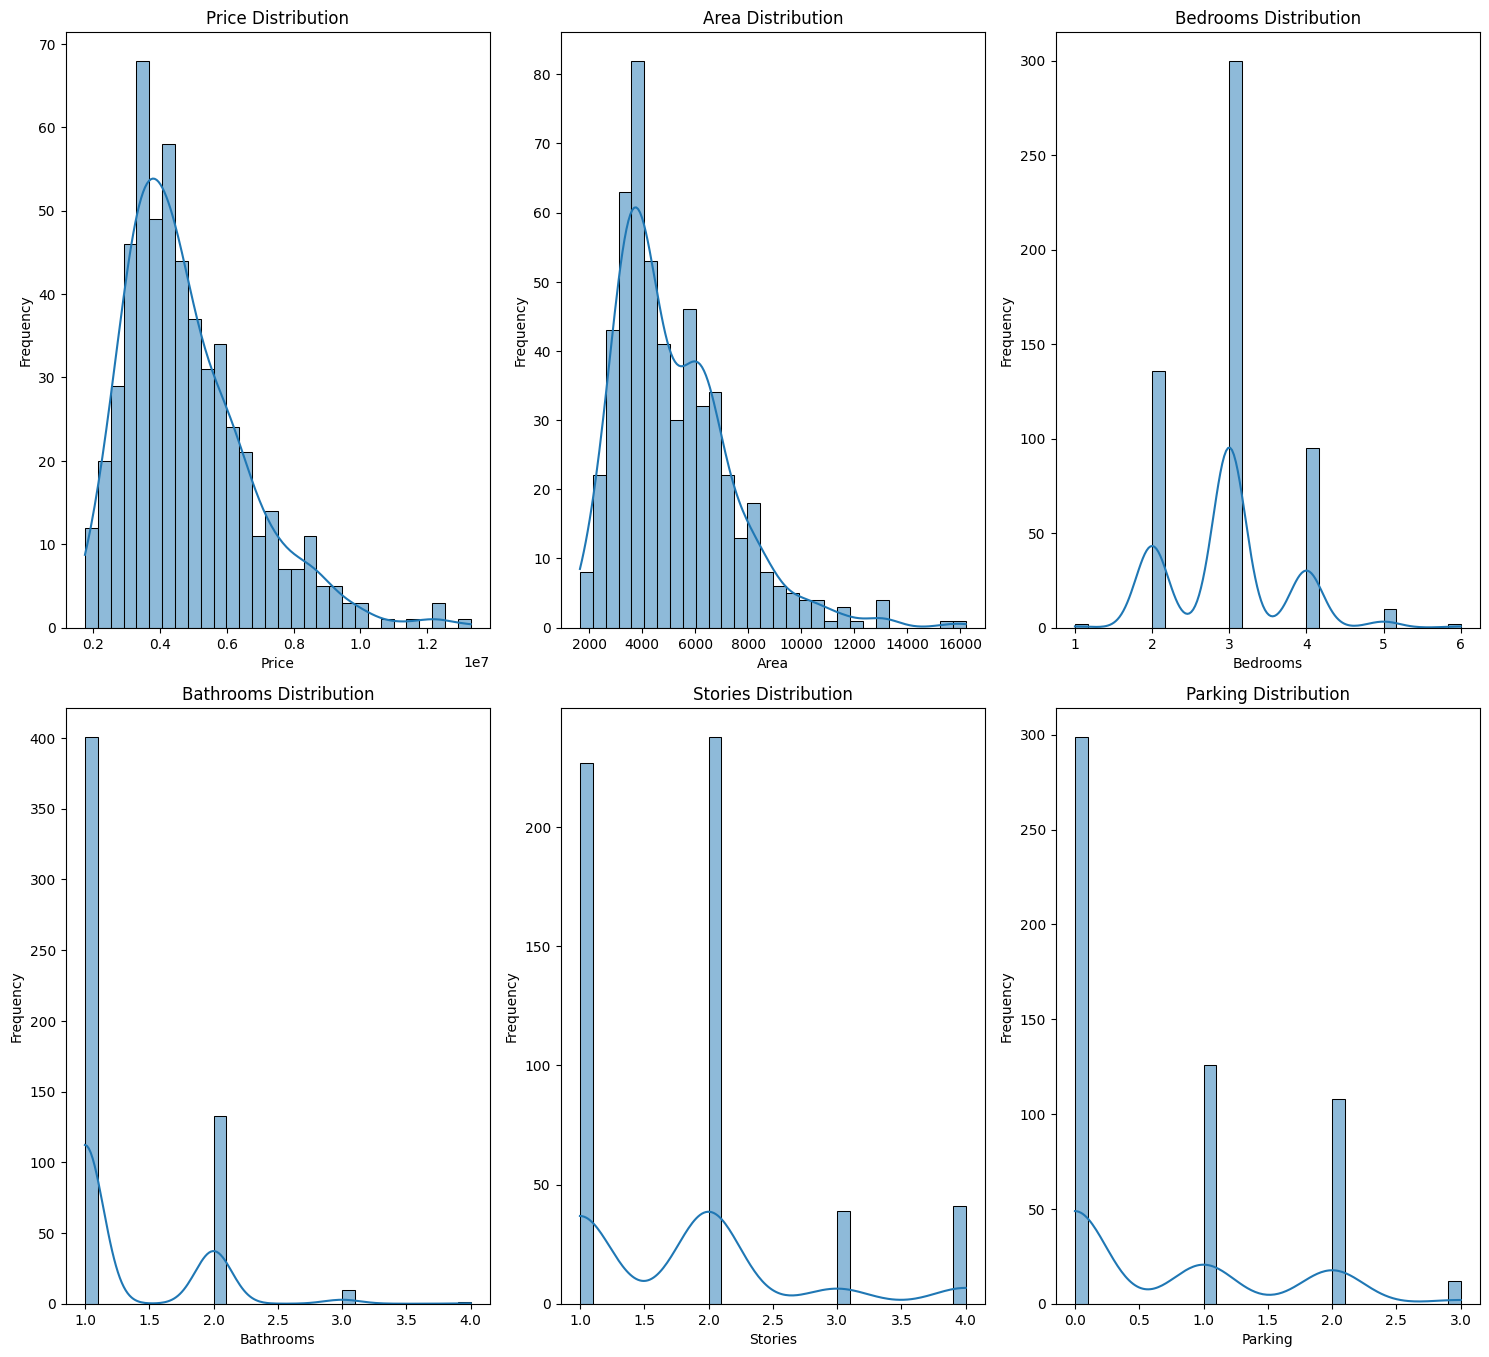

In [22]:
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Plot Distributions for Each Numerical Variable
plt.figure(figsize=(15, 20))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

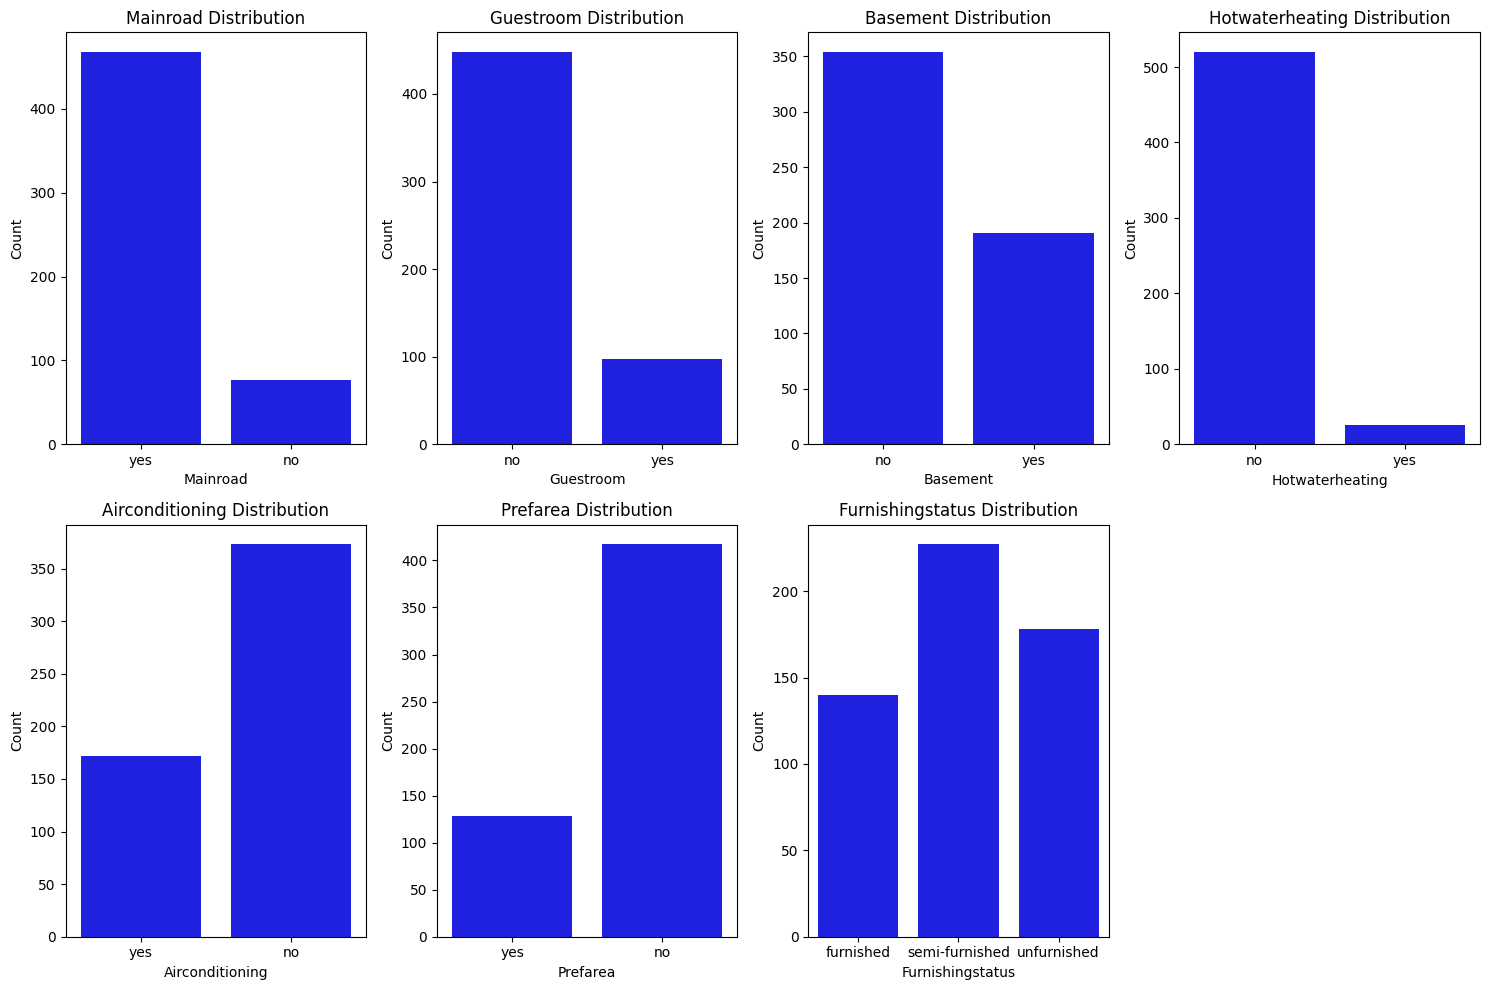

In [21]:
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


# Determine the number of rows needed for subplots (using 4 columns for layout)
num_plots = len(categorical_columns)
num_cols = 4
num_rows = (num_plots + 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=col, data=data,color='blue')
    plt.title(f'{col.capitalize()} Distribution')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

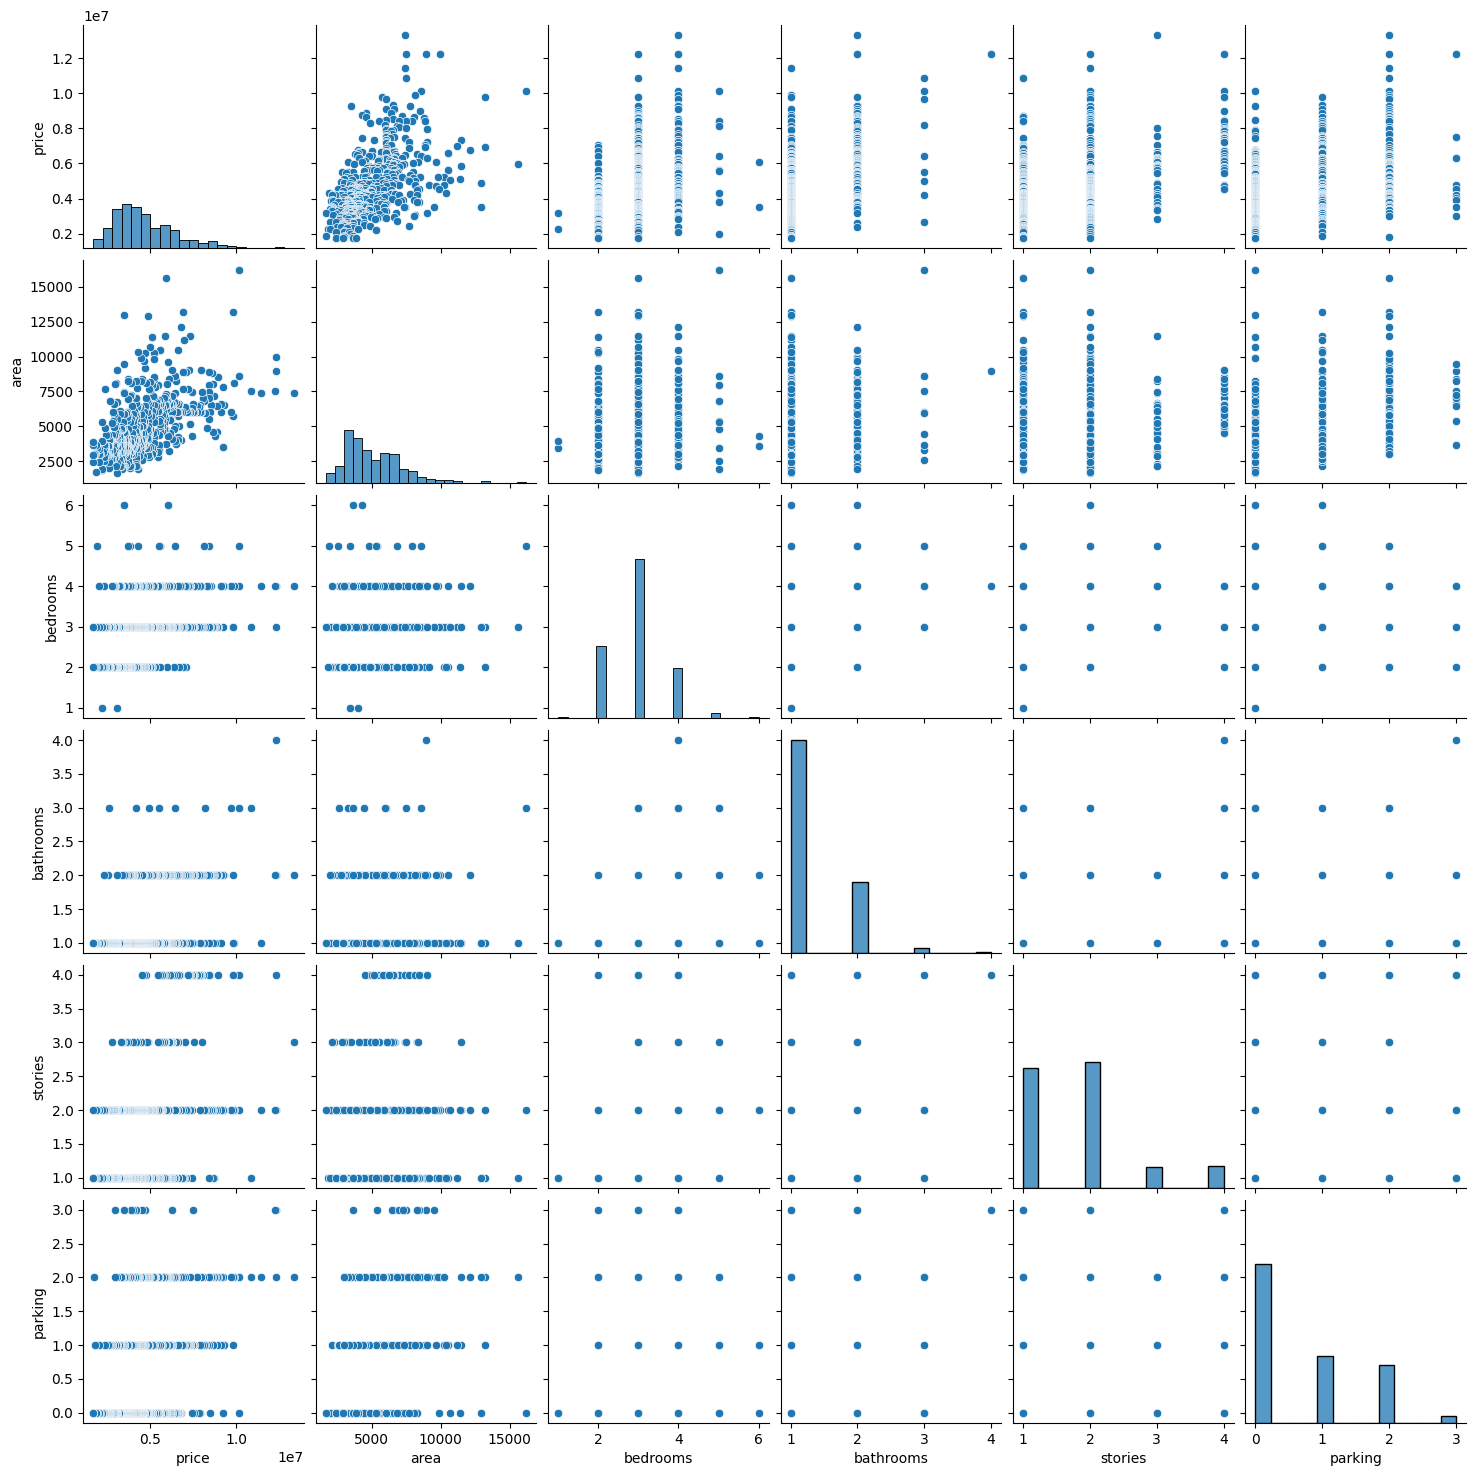

In [5]:
sns.pairplot(data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()

**Analysis**

Price: Skewed distribution with more lower-priced houses.

Area: Right-skewed distribution, indicating more houses have smaller areas.

Bedrooms: Mostly concentrated around 2 to 3 bedrooms.

Bathrooms: Mostly concentrated around 1 to 2 bathrooms.

Stories: Majority of houses have 1 to 2 stories.

Parking: Most houses have 0 to 2 parking spaces.

# Observations

**Strongest Relationships:** Price with area shows the most noticeable positive correlation, though the scatter plot indicates significant variability. Bathrooms also have a moderate correlation with price.

**Weak Relationships:**Bedrooms, stories, and parking have weak to very weak correlations with price and each other, indicating these features independently influence house characteristics to a lesser extent.

**Distribution:** The distributions highlight that most houses in the dataset have lower prices, smaller areas, fewer bedrooms and bathrooms, fewer stories, and limited parking.

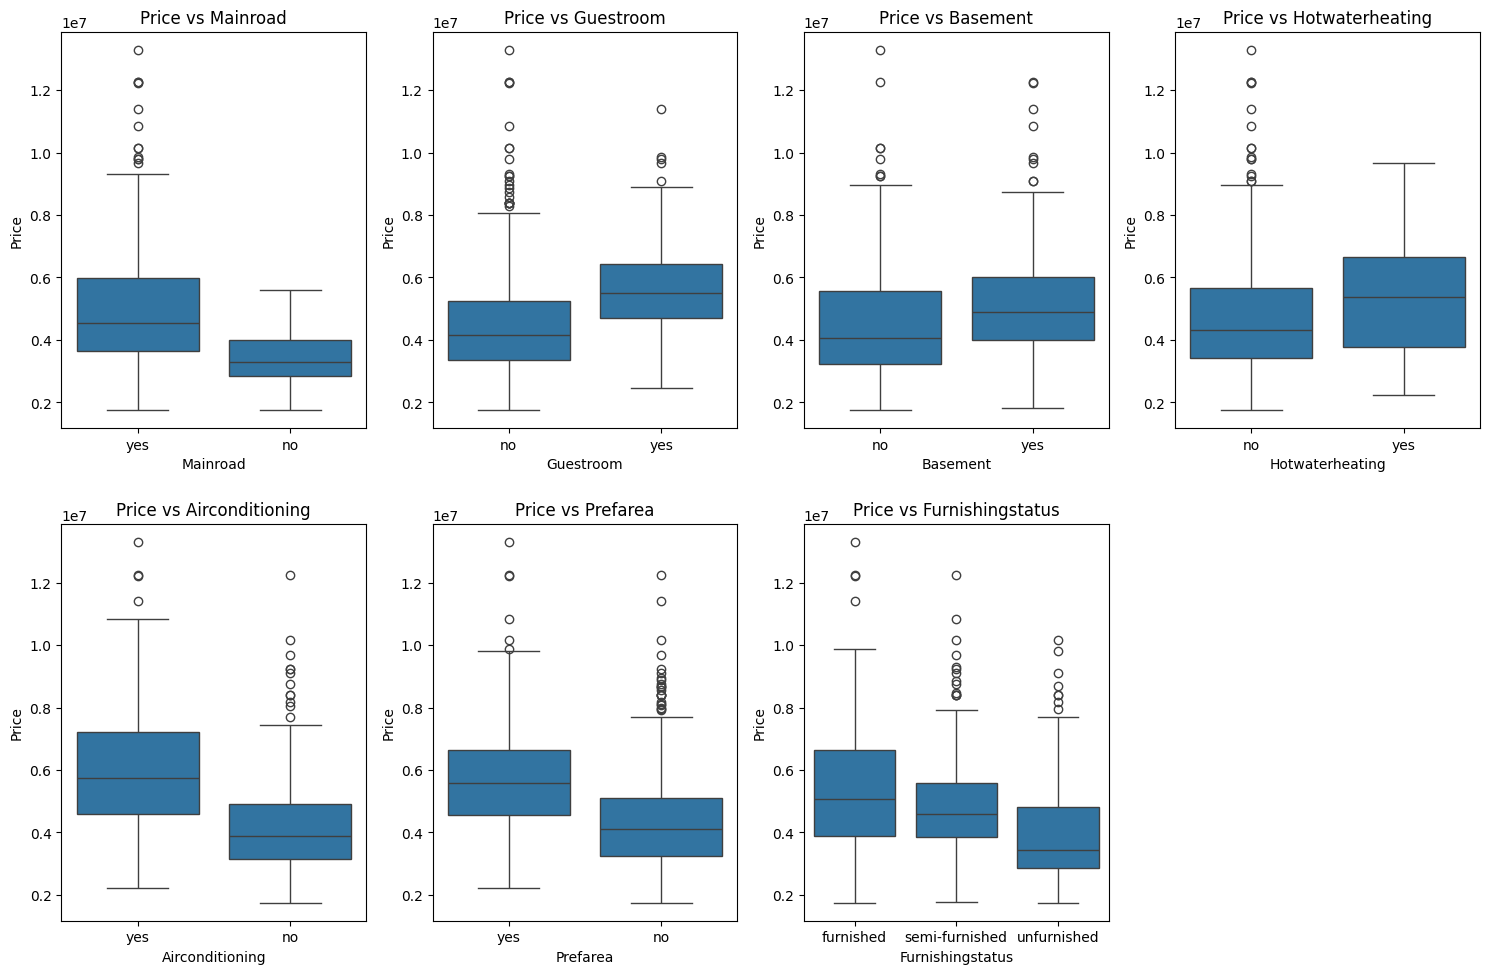

In [13]:
plt.figure(figsize=(15, 10))

for i, cat_col in enumerate(categorical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=cat_col, y='price', data=data)
    plt.title(f'Price vs {cat_col.capitalize()}')
    plt.xlabel(cat_col.capitalize())
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

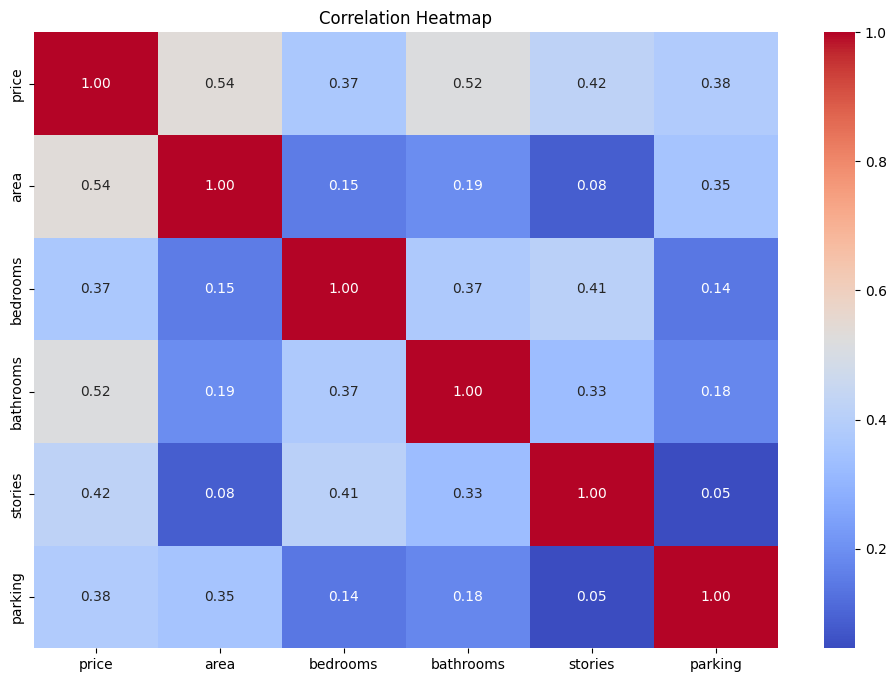

In [15]:
plt.figure(figsize=(12, 8))
corr_matrix = data[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Analysis:**

-**Strongest Correlations**: Price with area (0.54) and price with bathrooms (0.52).

**-Weakest Correlations:**Stories with parking (0.05) and area with stories (0.08).

**-Moderate Correlations:** Price with stories (0.42) and price with parking (0.38).
# **Implications:**
**The price of a house is most strongly influenced by the area and the number of bathrooms**, while other factors like the number of stories and parking spaces have a weaker influence. The relationships among the other variables are generally weak, indicating that these features vary independently of one another in most cases.

In [25]:
#feature splitting
X = data.drop(columns=['price'])  # Features (all columns except 'price')
y = data['price']  # Target variable

# Display the first few rows of X and y
print("Features (X):")
print(X.head())
print("\nTarget variable (y):")
print(y.head())

Features (X):
   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420         4          2        3      yes        no       no   
1  8960         4          4        4      yes        no       no   
2  9960         3          2        2      yes        no      yes   
3  7500         4          2        2      yes        no      yes   
4  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Target variable (y):
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [27]:
# Performing one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Display the first few rows of the encoded features
print("Encoded Features (X):")
print(X_encoded.head())

Encoded Features (X):
   area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  7420         4          2        3        2        False          True   
1  8960         4          4        4        3        False          True   
2  9960         3          2        2        2        False          True   
3  7500         4          2        2        3        False          True   
4  7420         4          1        2        2        False          True   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0          True          False         True         False                True   
1          True          False         True         False                True   
2          True          False        False          True                True   
3          True          False        False          True                True   
4         False           True        False          True                True   

   hotwaterheating_yes  airc

**Splitting data into train and test data and Model selection**

In [28]:
from sklearn.model_selection import train_test_split

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (436, 20)
X_test shape: (109, 20)
y_train shape: (436,)
y_test shape: (109,)


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initializing the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Predictions
rf_predictions = rf_model.predict(X_test)

In [30]:

# Initializing the model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model
gb_model.fit(X_train, y_train)

# Predictions
gb_predictions = gb_model.predict(X_test)

**MODEL EVALUATION **

In [33]:
# Evaluate the model of Random Forest
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Regressor Performance:")
print("MAE: ", rf_mae)
print("MSE: ", rf_mse)
print("RMSE: ", rf_rmse)
print("\n")
# Evaluate the model Gradient boosting
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_rmse = np.sqrt(gb_mse)

print("Gradient Boosting Regressor Performance:")
print("MAE: ", gb_mae)
print("MSE: ", gb_mse)
print("RMSE: ", gb_rmse)

Random Forest Regressor Performance:
MAE:  1025824.3793577981
MSE:  1971426095653.9329
RMSE:  1404074.8183960614


Gradient Boosting Regressor Performance:
MAE:  969687.9265798924
MSE:  1695341286633.702
RMSE:  1302052.7203741414


**Analysis:**


**Mean Absolute Error (MAE):** The average absolute error in the predictions is lower for the Gradient Boosting model.

**Mean Squared Error (MSE):** The average squared error is also lower for the Gradient Boosting model.

**Root Mean Squared Error (RMSE):** The square root of the average squared error is lower for the Gradient Boosting model, indicating that it has smaller errors on average compared to the Random Forest model.

# Conclusion:
The Gradient Boosting Regressor outperforms the Random Forest Regressor in this case. The lower error metrics indicate that the ***Gradient Boosting model provides more accurate predictions of house prices.***